In [332]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, sample, randint
#%matplotlib inline

### Funci&oacute;n para graficar superficies

In [98]:
def GraficaSuperficie(function ):
    #Gráficas de curvas de nivel
    X = np.linspace(-5,5,100)
    Y = np.linspace(-5,5,100)
    X, Y = np.meshgrid(X, Y)
    Z = getFunction(X,Y,function)
    
    plt.clf()
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50)
    plt.clabel(ax, inline=1, fontsize=10)
    plt.title('Poblacion')

### Funci&oacute;n que calcula la aptitud de un individuo
    Igual es utilizada para graficar las superficies

In [99]:
def getFunction(X,Y,function = None):
    Z = 0
    if function == 1 : #Funcion de De Jong
        Z = X**2 + Y**2

    elif function == 2: #Funcion: Rosenbrock's Valley
        Z = 100*(Y-X**2)**2 + (1-X)**2 
        
    elif function == 3: #Funcion de Rastrigin
        Z = 20+X**2+Y**2-10*np.cos(2*np.pi*X)-10*np.cos(2*np.pi*Y)
        
    elif function == 4: #Funcion Rotated hyper-ellipsoid
        Z=X**2 + (X**2 +Y**2)
    
    elif function == 5:
        Z= ((X**2 + Y**2)/4000) - np.cos(X)*np.cos(Y/np.sqrt(2)) + 1

    
    return Z

### Funci&oacute;n para iniciar la poblaci&oacute;n

In [76]:
def IniciaPob(N,n_var,n_bits):
    Pob = []
    for i in range(N):
        I = ''
        for v in range(n_var):
            for b in range(n_bits):
                I = I+sample(['0','1'],1)[0]
        Pob.append(I)
    return Pob

### Funci&oacute;n para convertir de binario a decimal

In [77]:
def Ind2Number(I, v_min, v_max, n_vars, n_bits):        
    numb = []
    for i in range(n_vars):
        cod_v = I[i*n_bits:(i+1)*n_bits]
        d_i = int(cod_v,2)
        val = v_min[i]+d_i*(v_max[i]-v_min[i])/float(2**n_bits-1)
        numb.append(val)
    return numb        

### Funci&oacute;n para convertir toda la poblaci&oacute;n a decimal

In [78]:
def Convert_Poblation(P0, v_min, v_max, n_var, n_bits):
    poblacion = []
    for p in P0:
        poblacion.append(Ind2Number(p,v_min,v_max,n_var,n_bits))
    return poblacion

### Funci&oacute;n que nos entrega la aptitud en una posici&oacute;n

In [79]:
def Aptitude(I,f,gen = False):
    if gen:
        [x1,x2] = I[0],I[1]
    else:
        [x1,x2] = Ind2Number(I,v_min,v_max,n_var,n_bits)
        
    r = getFunction(x1,x2,f)
    return 1.0/(1.0+0.1*r)

In [105]:
def Pop_Aptitude(P,function):
    apt_v = []
    for I in P:
        ap = Aptitude(I,function)
        #print 'Individuo ' + I + ', aptitud = '  + str(ap)
        apt_v.append(ap)
    return apt_v

## Algoritmos Geneticos

In [80]:
def CrossOver(I1,I2):
    n = len(I1)
    p = randint(1,n-2)
    b1 = I1[:p]
    b2 = I2[p:]
    return b1+b2

In [81]:
def select(P,Aptitude):
    apt_acum = sum(Aptitude)
    r = random()*apt_acum
    s = 0
    for i,I in enumerate(P):
        s = s+Aptitude[i]
        if s >= r:
            return I
    return I

In [82]:
def CrossOverPop(P,Aptitude):
    CrossP = []
    for I in P:
        I1 = select(P,Aptitude)
        I2 = select(P,Aptitude)
        nI = CrossOver(I1,I2)
        CrossP.append(nI)
    return CrossP      

In [83]:
def Mutation(P,pm):
    PM = []
    cs = {'0':'1','1':'0'}
    for I in P:
        nI = ''
        for b in I:
            if random() < pm:
                nI = nI+cs[b]
            else:
                nI = nI+b
        PM.append(nI)
    return PM  

In [84]:
def SelectP(P1,P2,A1,A2):
    PS = []
    for i in range(len(P1)):
        if A1[i] > A2[i]:
            PS.append(P1[i])
        else:
            PS.append(P2[i])
    return PS

In [85]:
def Evolution(P0,pm,gnrtns):
    P = P0
    for g in range(gnrtns):
        AP = Pop_Aptitude(P)
        PC = CrossOverPop(P,AP)
        PM = Mutation(PC,pm)
        AM = Pop_Aptitude(PM)
        P = SelectP(P,PM,AP,AM)
    return P   

In [242]:
def Algoritmo_Genetico(P,function,pm,times):
    
    for i in range(times):
        aptitudes = Pop_Aptitude(P,function)
        PC = CrossOverPop(P,aptitudes)
    
        PM = Mutation(PC,pm)
        PM_Aptitude = Pop_Aptitude(PM,function)
        P1 = SelectP(P0,PM,aptitudes,PM_Aptitude)
        P = P1

    return P1

Algoritmo_Genetico(P0,1,.2,5)

['1011001000',
 '1101101100',
 '0011101001',
 '1010010000',
 '0110011110',
 '1010001000',
 '1000000010',
 '1010001111',
 '1000010010',
 '0000110100']

### Estrategias Evolutivas

#### Evoluci&oacute;n

In [86]:
def Evo(parents,child_size,ro):
    childs = []
    for i in range(child_size):
        p = np.array(sample(parents,ro))
        childs.append([np.sum(p[:,0])/len(p),np.sum(p[:,1])/len(p)])
    return childs


#### Mutaci&oacute;n

In [87]:
def Mutacion(P,sd):
    mutatedChilds = []
    for i in P:
        mutatedChilds.append([i[0]+np.random.normal(loc = 0,scale=sd),i[1]+np.random.normal(loc = 0,scale=sd)])
    return mutatedChilds


#### Selecci&oacute;n

In [88]:
def Seleccion(P,N,function):
    selected = []
    aptitudes = []
    newGen = []
    
    for i in P:
        aptitudes.append(np.array([i[0],i[1],Aptitude(i,function,True)]))
    aptitudes = sorted(aptitudes,key= lambda x: x[2],reverse=True)

    for new in aptitudes[:N]:
        newGen.append([new[0],new[1]])
    
    return newGen

In [323]:
def Estrategias_Evolutivas(P,function,childs,ro,sd,times = 1):

    for i in range(times):
        newGen = Evo(P,childs,ro)
        newGen = Mutacion(newGen,sd)
        newGen = Seleccion(newGen,N,function)
        P = newGen
    
    return newGen


### Descenso de gradiente

#### Gradientes


In [89]:
def Gradiente(X,Y,function):
    xgrad = 0
    ygrad = 0
    
    if function == 1 : #Funcion de De Jong
        xgrad = 2*X
        ygrad = 2*Y

    elif function == 2: #Funcion: Rosenbrock's Valley
        
        #Z = 100*(Y-X**2)**2 + (1-X)**2 
        xgrad = -400*X*(Y-X**2) + 2*(1-X)
        ygrad = 200*(1-X**2)
        
    elif function == 3: #Funcion de Rastrigin
        xgrad = 2*X + 20*np.pi*np.sin(2*np.pi*X)
        ygrad = 2*Y + 20*np.pi*np.sin(2*np.pi*Y)
    
    elif function == 4: #Funcion Rotated Hyper-ellipsoid
        xgrad = 4*X
        ygrad = 2*Y
       
    elif function == 5: #Funcion de Grimewangk
        xgrad = (X/2000) + np.sin(X)*np.cos(Y/np.sqrt(2))
        ygrad = (Y/2000) + (1/np.sqrt(2))*np.cos(X)*np.sin(Y/np.sqrt(2))

    return xgrad,ygrad

In [309]:
def GradientDescent(P0,function,gamma,prec,times):
    
    for i in range(times):
    
        for ind in P0:
            sx,sy = Gradiente(ind[0],ind[1],function)
            sig_stp = (ind[0] - gamma*sx,ind[1] - gamma*sy)
            stp = (ind[0] - sig_stp[0],ind[1] - sig_stp[1])
            
            if stp[0] <= prec and stp[1] <= prec:
                break

    return sig_stp

### Funci&oacute;n para imprimir la poblaci&oacute;n

In [305]:
def Imprime_Poblacion(P):
    for item in P:
        print item

### Funcion para crear la poblaci&oacute;n

In [307]:
def CreaPoblacion(N,n_bits,n_var):
    v_min = np.full(n_var,-5)
    v_max = np.full(n_var,5)
    
    P0 = IniciaPob(N,n_var,n_bits)
    P0_Gen = Convert_Poblation(P0,v_min,v_max,n_var,n_bits)
    
    print "\nPoblacion inicial:"
    Imprime_Poblacion(P0)
    print "\nPoblacion inicial en decimal:\n"
    Imprime_Poblacion(P0_Gen)
    
    return P0,P0_Gen

#### Funci&oacute;n que ejecuta la funci&oacute;n indicada

In [330]:
def executeFunction(P0,P0_Gen,function):
    
    Gen = Algoritmo_Genetico(P0,function,.5,5)
    Evo = Estrategias_Evolutivas(P0_Gen,function,20,5,.5,1)
    Grad = GradientDescent(P0_Gen,function,.1,0.00001,5)
    
    
    

### Iniciamos la poblaci&oacute;n

In [320]:
P0,P0_Gen = CreaPoblacion(20,5,2)


Poblacion inicial:
0000111100
1000011000
0110010001
0101001101
0000010011
0101011000
1000101110
0101110101
0101110010
0101111111
1011011001
0101010111
0011011110
1011001100
0111000001
1110001110
1111000000
0110001001
1100100001
0001011000

Poblacion inicial en decimal:

[-4.67741935483871, 4.03225806451613]
[0.16129032258064502, 2.741935483870968]
[-1.129032258064516, 0.48387096774193505]
[-1.774193548387097, -0.806451612903226]
[-5.0, 1.129032258064516]
[-1.774193548387097, 2.741935483870968]
[0.48387096774193505, -0.48387096774193505]
[-1.4516129032258065, 1.774193548387097]
[-1.4516129032258065, 0.806451612903226]
[-1.4516129032258065, 5.0]
[2.096774193548387, 3.064516129032258]
[-1.774193548387097, 2.419354838709677]
[-3.064516129032258, 4.67741935483871]
[2.096774193548387, -1.129032258064516]
[-0.48387096774193505, -4.67741935483871]
[4.03225806451613, -0.48387096774193505]
[4.67741935483871, -5.0]
[-1.129032258064516, -2.096774193548387]
[3.064516129032258, -4.67741935483871]
[

#### Funcion de De Jong

<Figure size 432x288 with 0 Axes>

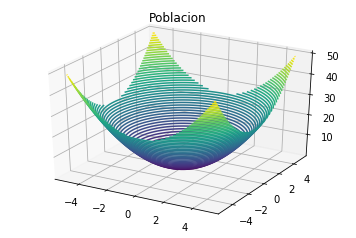

In [310]:
GraficaSuperficie(1)


### Funci&oacute;n Rosenbrook's Valley

<Figure size 432x288 with 0 Axes>

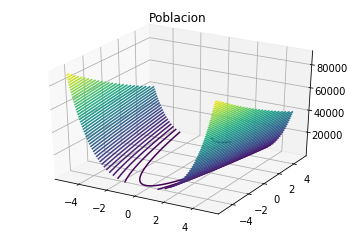

In [93]:
GraficaSuperficie(2)

### Funci&oacute;n de Rastrigin

<Figure size 432x288 with 0 Axes>

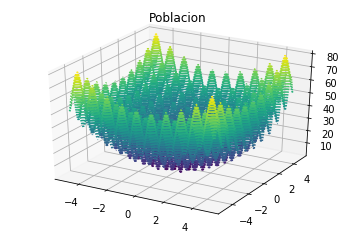

In [94]:
GraficaSuperficie(3)

### Funci&oacute;n Rotated Hyper-Ellipsoid

<Figure size 432x288 with 0 Axes>

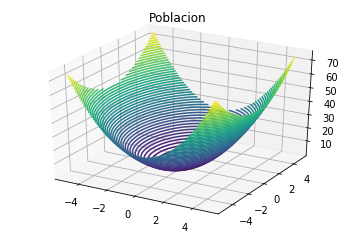

In [95]:
GraficaSuperficie(4)

<Figure size 432x288 with 0 Axes>

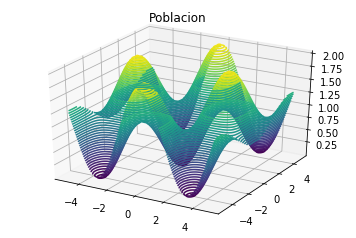

In [101]:
GraficaSuperficie(5)